In [1]:
import ROOT
import os
import numpy as np
import pandas as pd

Welcome to JupyROOT 6.26/10


In [2]:
saveDir = "checkSaturatedEvents"
try:
    os.mkdir(saveDir)
except OSError as error:
    print(error) 
    print("Here: "+os.getcwd()+"/"+saveDir)

[Errno 17] File exists: 'checkSaturatedEvents'
Here: /Users/slezki/working/na62/singleTracks/checkSaturatedEvents


In [3]:
#ROOT.EnableImplicitMT(4)
rFile = "/Volumes/Buio/na62/data/singleTracks/checkSingleTracks_addCellInfo_BD2021.root"
rTree = "singleTracks"
df = ROOT.RDataFrame(rTree,rFile)

# Baseline selection criteria

In [4]:
baselineCuts = "Trigger_NewCHOD && Trigger_LKr && Trigger_Q1 && Tracks_NewCHODTimeExist"
acceptance = "Tracks_accANTI0 == 1 && Tracks_accLAV12 == 1 && Tracks_accSTRAW0 == 1 && Tracks_accSTRAW1 == 1 && Tracks_accSTRAW2 == 1 && Tracks_accSTRAW3 == 1 && Tracks_accNewCHOD == 1 && Tracks_accLKr == 1 && Tracks_accMUV1 == 1 && Tracks_accMUV2 == 1 && Tracks_accMUV3 == 1 && Tracks_accCHOD == 1";
trksCuts = "Tracks_chi2<20"

In [5]:
filterCuts = baselineCuts+"&&"+acceptance+"&&"+trksCuts
df_skim = df.Filter(filterCuts)

Warning in <TClass::Init>: no dictionary for class Stream is available
Warning in <TClass::Init>: no dictionary for class RecoInfo is available
Warning in <TClass::Init>: no dictionary for class AnalysisInfo is available
Warning in <TClass::Init>: no dictionary for class CheckPointInfo is available
Warning in <TClass::Init>: no dictionary for class NA62Analysis::Core::AnalyzerIdentifier is available
Warning in <TClass::Init>: no dictionary for class MCInfo is available
Warning in <TClass::Init>: no dictionary for class BeamLineInfo is available


# Convert MeV to GeV

In [6]:
df_skim = df_skim.Redefine("Tracks_p","Tracks_p*0.001")
df_skim = df_skim.Redefine("Tracks_lkrE","Tracks_lkrE*0.001")
df_skim = df_skim.Redefine("Tracks_lkrTotE","Tracks_lkrTotE*0.001")
df_skim = df_skim.Redefine("Tracks_muv1E","Tracks_muv1E*0.001")
df_skim = df_skim.Redefine("Tracks_muv2E","Tracks_muv2E*0.001")
df_skim = df_skim.Redefine("Tracks_CaloE","Tracks_CaloE*0.001")
df_skim = df_skim.Redefine("Cluster_E","Cluster_E*0.001")
df_skim = df_skim.Redefine("Cluster_correctedEnergy","Cluster_correctedEnergy*0.001")
df_skim = df_skim.Redefine("Tracks_p_BeforeFit","Tracks_p_BeforeFit*0.001")
df_skim = df_skim.Redefine("Tracks_pX_BeforeMagnet","Tracks_pX_BeforeMagnet*0.001")
df_skim = df_skim.Redefine("Tracks_pY_BeforeMagnet","Tracks_pY_BeforeMagnet*0.001")
df_skim = df_skim.Redefine("Tracks_pZ_BeforeMagnet","Tracks_pZ_BeforeMagnet*0.001")
df_skim = df_skim.Redefine("Tracks_pX_AfterMagnet","Tracks_pX_AfterMagnet*0.001")
df_skim = df_skim.Redefine("Tracks_pY_AfterMagnet","Tracks_pY_AfterMagnet*0.001")
df_skim = df_skim.Redefine("Tracks_pZ_AfterMagnet","Tracks_pZ_AfterMagnet*0.001")

# Add new branches

In [7]:
df_skim = df_skim.Define("Tracks_caloEoP","Tracks_CaloE/Tracks_p")
df_skim = df_skim.Define("Tracks_muv1EoP","Tracks_muv1E/Tracks_p")
df_skim = df_skim.Define("Tracks_muv2EoP","Tracks_muv2E/Tracks_p")
df_skim = df_skim.Define("Tracks_muv12E","Tracks_muv1E+Tracks_muv2E")
df_skim = df_skim.Define("Tracks_muv12E_subs","Tracks_CaloE-Tracks_lkrE")
df_skim = df_skim.Define("Tracks_muv12EoP","Tracks_muv12E/Tracks_p")
df_skim = df_skim.Define("Tracks_muv12EoP_subs","Tracks_muv12E_subs/Tracks_p")
df_skim = df_skim.Define("BestClusterEOP","BestClusterEnergy/Tracks_p")
df_skim = df_skim.Define("Tracks_assocTime","Tracks_CHODTimeExist ? Tracks_CHODTime : Tracks_NewCHODTime")
df_skim = df_skim.Define("DeltaE_CorrNative","fabs(BestClusterEnergy-Tracks_lkrE)")
df_skim = df_skim.Define("Sat","PossibleSaturation")
df_skim = df_skim.Define("NeighbourE","HighestNeighbourEnergy")
df_skim = df_skim.Define("DS_LKrE","Tracks_lkrE")
df_skim = df_skim.Define("BestClusE","BestClusterEnergy")

# Reject tracks if $\Delta T[tracks,trigger] > 5 ns$

In [8]:
df_skim = df_skim.Filter("fabs(Tracks_assocTime - Trigger_Time) < 5")

# Reject $MUV12$ associations

In [9]:
df_muv12_f_and = df_skim.Filter("Tracks_MUV1AssociationExists==0 && Tracks_MUV2AssociationExists==0")

# Check Downstream tracks $p$ and $E_{LKr}$

Info in <TCanvas::Print>: png file ./checkSaturatedEvents/lkr_PvsEoP_muv12fand.png has been created


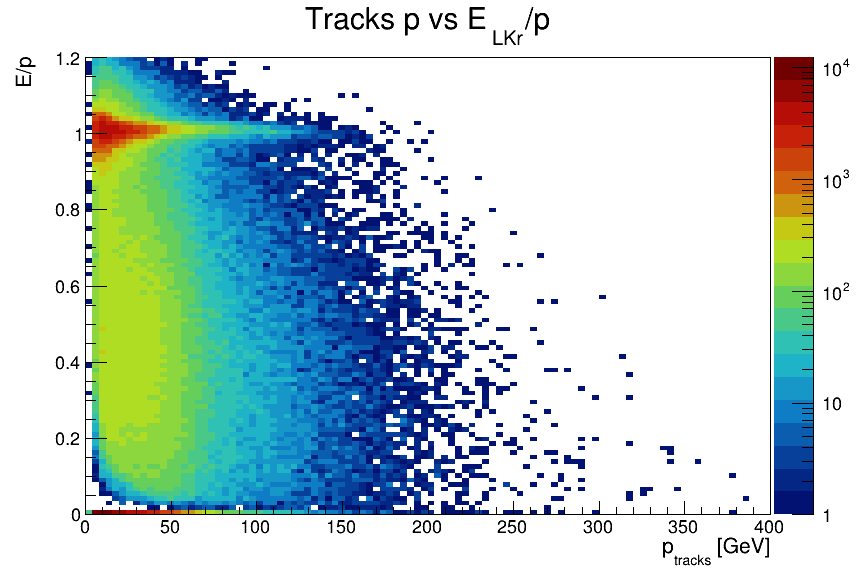

In [10]:
lkr_PvsEoP_muv12fand = df_muv12_f_and.Histo2D(("lkr_PvsEoP_muv12fand","lkr_PvsEoP_muv12fand",100,0,400,100,0,1.2),"Tracks_p","Tracks_lkrEoP")
clkr_PvsEoP_muv12fand = ROOT.TCanvas("clkr_PvsEoP_muv12fand","clkr_PvsEoP_muv12fand",860,600)
clkr_PvsEoP_muv12fand.SetLogz()
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetPalette(ROOT.kRainBow)
lkr_PvsEoP_muv12fand.SetTitle("Tracks p vs E_{LKr}/p")
lkr_PvsEoP_muv12fand.GetXaxis().SetTitleSize(0.04)
lkr_PvsEoP_muv12fand.GetYaxis().SetTitleSize(0.04)
lkr_PvsEoP_muv12fand.SetXTitle("p_{tracks} [GeV]")
lkr_PvsEoP_muv12fand.SetYTitle("E/p")
lkr_PvsEoP_muv12fand.Draw("COLZ")
clkr_PvsEoP_muv12fand.Draw()
clkr_PvsEoP_muv12fand.SaveAs("./"+saveDir+"/lkr_PvsEoP_muv12fand.png")

Info in <TCanvas::Print>: png file ./checkSaturatedEvents/lkr_EvsEoP_muv12fand.png has been created


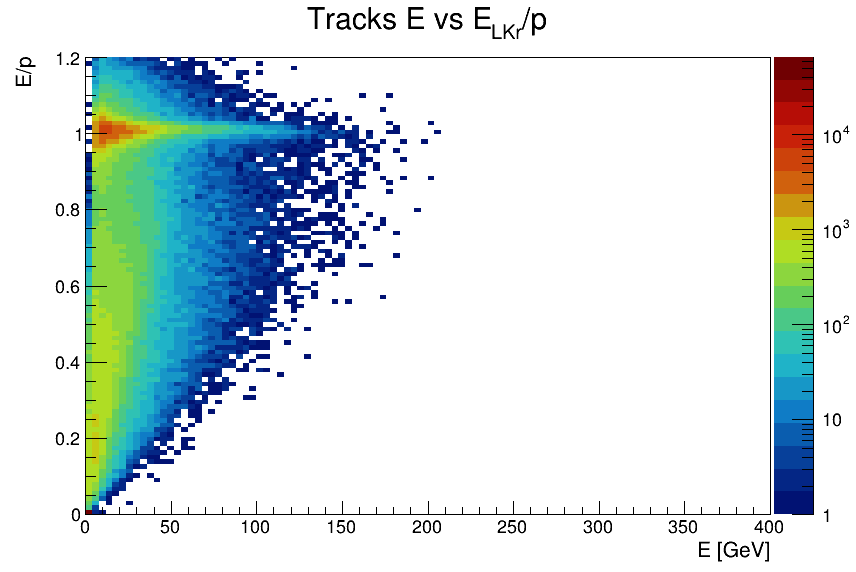

In [11]:
lkr_EvsEoP_muv12fand = df_muv12_f_and.Histo2D(("lkr_EvsEoP_muv12fand","lkr_EvsEoP_muv12fand",100,0,400,100,0,1.2),"Tracks_lkrE","Tracks_lkrEoP")
clkr_EvsEoP_muv12fand = ROOT.TCanvas("clkr_EvsEoP_muv12fand","clkr_EvsEoP_muv12fand",860,600)
clkr_EvsEoP_muv12fand.SetLogz()
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetPalette(ROOT.kRainBow)
lkr_EvsEoP_muv12fand.SetTitle("Tracks E vs E_{LKr}/p")
lkr_EvsEoP_muv12fand.GetXaxis().SetTitleSize(0.04)
lkr_EvsEoP_muv12fand.GetYaxis().SetTitleSize(0.04)
lkr_EvsEoP_muv12fand.SetXTitle("E [GeV]")
lkr_EvsEoP_muv12fand.SetYTitle("E/p")
lkr_EvsEoP_muv12fand.Draw("COLZ")
clkr_EvsEoP_muv12fand.Draw()
clkr_EvsEoP_muv12fand.SaveAs("./"+saveDir+"/lkr_EvsEoP_muv12fand.png")

# Check $E_{LKr}/p$ > 0.4

In [12]:
df_muv12_f_and_EoPgt0p4 = df_muv12_f_and.Filter("Tracks_lkrEoP>0.4&&DeltaE_CorrNative>0.")

Info in <TCanvas::Print>: png file ./checkSaturatedEvents/lkr_PvsDeltaE_muv12fand.png has been created


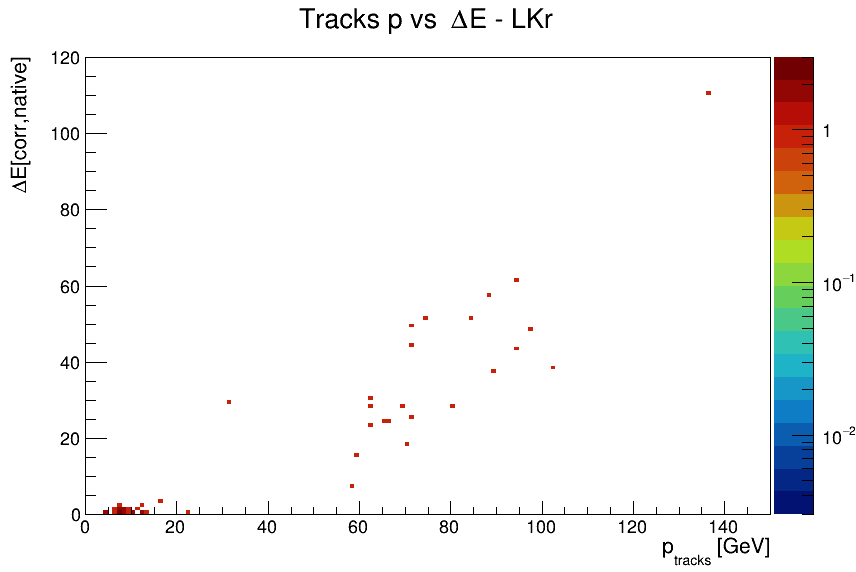

In [13]:
lkr_PvsDeltaE_muv12fand = df_muv12_f_and_EoPgt0p4.Histo2D(("lkr_PvsDeltaE_muv12fand","lkr_PvsDeltaE_muv12fand",150,0,150,120,0,120),"Tracks_p","DeltaE_CorrNative")
clkr_PvsDeltaE_muv12fand = ROOT.TCanvas("clkr_PvsDeltaE_muv12fand","",860,600)
clkr_PvsDeltaE_muv12fand.SetLogz()
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetPalette(ROOT.kRainBow)
lkr_PvsDeltaE_muv12fand.SetTitle("Tracks p vs #DeltaE - LKr")
lkr_PvsDeltaE_muv12fand.GetXaxis().SetTitleSize(0.04)
lkr_PvsDeltaE_muv12fand.GetYaxis().SetTitleSize(0.04)
lkr_PvsDeltaE_muv12fand.SetXTitle("p_{tracks} [GeV]")
lkr_PvsDeltaE_muv12fand.SetYTitle("#DeltaE[corr,native]")
lkr_PvsDeltaE_muv12fand.Draw("COLZ")
clkr_PvsDeltaE_muv12fand.Draw()
clkr_PvsDeltaE_muv12fand.SaveAs("./"+saveDir+"/lkr_PvsDeltaE_muv12fand.png")

In [14]:
print("Number of Events: ", lkr_PvsDeltaE_muv12fand.GetEntries())

Number of Events:  48.0


- Sat: Possible saturation return true if seed energy less than Neighbour with highest energy.
- DS_LKrE: LKr Energy of Downstream tracks
- BestClusE: Energy of manually selected LKr candidate in radius direct.

In [15]:
disp_EoPgt0p4 = df_muv12_f_and_EoPgt0p4.Display(("RunID","EventID","Sat","SeedEnergy","NeighbourE","DS_LKrE","BestClusE"),100) 
disp_EoPgt0p4.Print()

+----------+-------+---------+-----+------------+-------------+-----------+-----------+
| Row      | RunID | EventID | Sat | SeedEnergy | NeighbourE  | DS_LKrE   | BestClusE | 
+----------+-------+---------+-----+------------+-------------+-----------+-----------+
| 1772615  | 11062 | 81692   | 0   | 15.069074  | 2.1192236   | 38.261386 | 19.723647 | 
+----------+-------+---------+-----+------------+-------------+-----------+-----------+
| 2498056  | 11068 | 93980   | 0   | 1.2909175  | 0.52116499  | 4.6960032 | 5.6405244 | 
|          |       |         | 0   | 1.1948656  | 0.89922356  |           |           | 
+----------+-------+---------+-----+------------+-------------+-----------+-----------+
| 2658970  | 11068 | 362005  | 0   | 12.367304  | 1.8993209   | 29.893611 | 4.3520855 | 
+----------+-------+---------+-----+------------+-------------+-----------+-----------+
| 3804948  | 11068 | 529759  | 0   | 1.9675295  | 1.3074201   | 5.1616747 | 3.4356965 | 
|          |       |      

# Check 1.05 > $E_{LKr}/p$ > 0.95

In [16]:
df_muv12_f_and_EoPin0p95to1p05 = df_muv12_f_and.Filter("Tracks_lkrEoP>0.95&&Tracks_lkrEoP<1.05&&DeltaE_CorrNative>0.")

Info in <TCanvas::Print>: png file ./checkSaturatedEvents/lkr_PvsDeltaE_muv12fand_EoPin0p95to1p05.png has been created


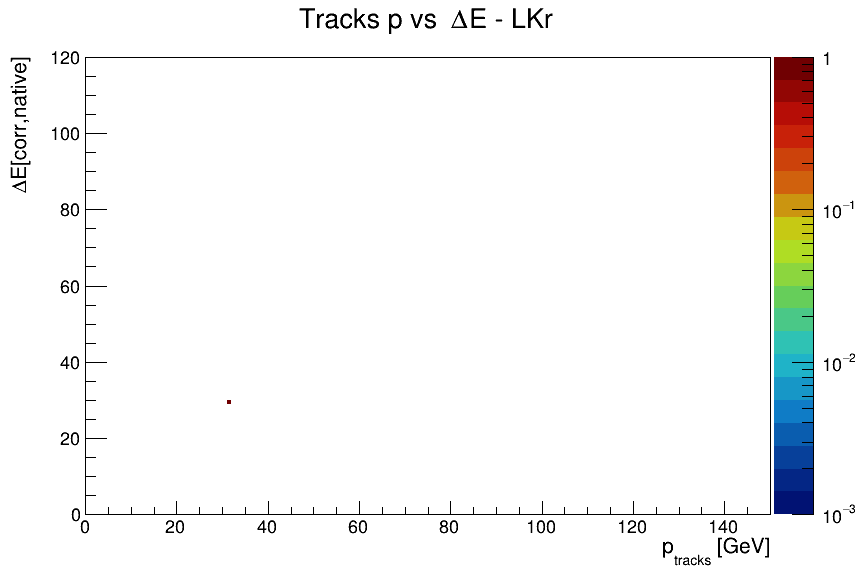

In [17]:
lkr_PvsDeltaE_muv12fand_EoPin0p95to1p05 = df_muv12_f_and_EoPin0p95to1p05.Histo2D(("lkr_PvsDeltaE_muv12fand_EoPin0p95to1p05","lkr_PvsDeltaE_muv12fand_EoPin0p95to1p05",150,0,150,120,0,120),"Tracks_p","DeltaE_CorrNative")
clkr_PvsDeltaE_muv12fand_EoPin0p95to1p05 = ROOT.TCanvas("clkr_PvsDeltaE_muv12fand_EoPin0p95to1p05","",860,600)
clkr_PvsDeltaE_muv12fand_EoPin0p95to1p05.SetLogz()
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetPalette(ROOT.kRainBow)
lkr_PvsDeltaE_muv12fand_EoPin0p95to1p05.SetTitle("Tracks p vs #DeltaE - LKr")
lkr_PvsDeltaE_muv12fand_EoPin0p95to1p05.GetXaxis().SetTitleSize(0.04)
lkr_PvsDeltaE_muv12fand_EoPin0p95to1p05.GetYaxis().SetTitleSize(0.04)
lkr_PvsDeltaE_muv12fand_EoPin0p95to1p05.SetXTitle("p_{tracks} [GeV]")
lkr_PvsDeltaE_muv12fand_EoPin0p95to1p05.SetYTitle("#DeltaE[corr,native]")
lkr_PvsDeltaE_muv12fand_EoPin0p95to1p05.Draw("COLZ")
clkr_PvsDeltaE_muv12fand_EoPin0p95to1p05.Draw()
clkr_PvsDeltaE_muv12fand_EoPin0p95to1p05.SaveAs("./"+saveDir+"/lkr_PvsDeltaE_muv12fand_EoPin0p95to1p05.png")

In [18]:
print("Number of Events: ", lkr_PvsDeltaE_muv12fand_EoPin0p95to1p05.GetEntries())

Number of Events:  1.0


In [19]:
disp_EoPin0p95to1p05 = df_muv12_f_and_EoPin0p95to1p05.Display(("RunID","EventID","Sat","SeedEnergy","NeighbourE","DS_LKrE","BestClusE"),100) 
disp_EoPin0p95to1p05.Print()

+----------+-------+---------+-----+------------+------------+-----------+-----------+
| Row      | RunID | EventID | Sat | SeedEnergy | NeighbourE | DS_LKrE   | BestClusE | 
+----------+-------+---------+-----+------------+------------+-----------+-----------+
| 27498137 | 11078 | 349853  | 0   | 7.0198648  | 1.4308571  | 31.711302 | 2.6173640 | 
|          |       |         | 1   | 1.1663383  | 1.2761321  |           |           | 
|          |       |         | 0   | 7.0198648  | 1.4308571  |           |           | 
+----------+-------+---------+-----+------------+------------+-----------+-----------+
